In [86]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train[0]

array([6], dtype=uint8)

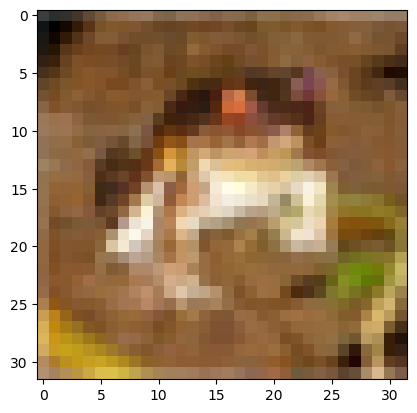

In [9]:
plt.imshow(x_train[0])

<Figure size 1500x200 with 0 Axes>

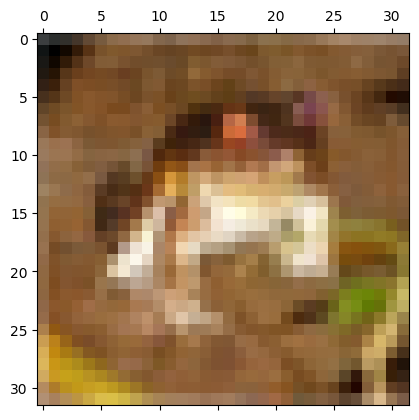

In [11]:
plt.figure(figsize=(15,2))
plt.matshow(x_train[0])

<Figure size 1500x200 with 0 Axes>

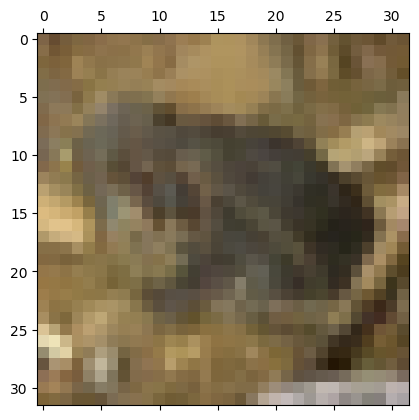

In [25]:
plt.figure(figsize = (15,2))
plt.matshow(x_train[23])

In [26]:
classes=['Airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [27]:
classes[6]

'frog'

In [36]:
def image_sample(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[index])

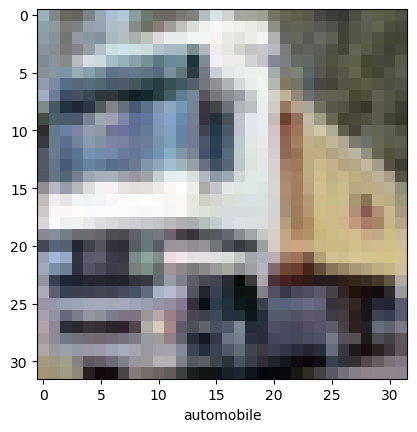

In [37]:
image_sample(x_train, y_train, 1)

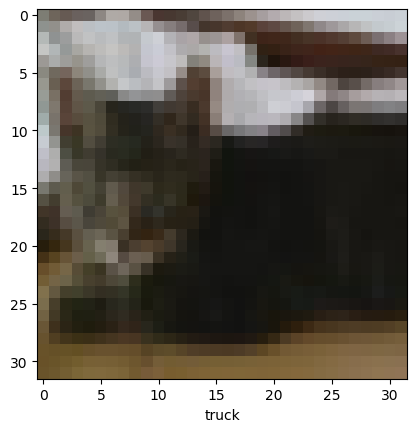

In [39]:
image_sample(x_train, y_train, 9)

In [44]:
y_train.shape

(50000, 1)

In [45]:
y_train[0]

array([6], dtype=uint8)

In [46]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [40]:
x_train = x_train/255
x_test = x_test/255

In [50]:
x_train.shape


(50000, 32, 32, 3)

In [64]:
len(x_train)

50000

In [65]:
x_train_flattened=x_train.reshape(50000,32*32)
x_train_flattened.shape

ValueError: cannot reshape array of size 153600000 into shape (50000,1024)

In [68]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 23s 4ms/step - loss: 1.9714 - accuracy: 0.3156
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8754 - accuracy: 0.3563
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8665 - accuracy: 0.3592
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8369 - accuracy: 0.3704
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8274 - accuracy: 0.3739


In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1500,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

1563/1563 [==============================] - 388s 243ms/step - loss: 1.8719 - accuracy: 0.3335


In [71]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 12s 27ms/step - loss: 1.6783 - accuracy: 0.3915


[1.6783068180084229, 0.39149999618530273]

In [72]:
model.predict(x_test)

313/313 [==============================] - 8s 26ms/step


array([[0.39542606, 0.5365241 , 0.5157041 , ..., 0.17415738, 0.5115707 ,
        0.4141772 ],
       [0.86348313, 0.9359395 , 0.10851772, ..., 0.12208877, 0.97728646,
        0.96694744],
       [0.877315  , 0.79563695, 0.20497346, ..., 0.18471374, 0.974733  ,
        0.9096362 ],
       ...,
       [0.205077  , 0.09793663, 0.7417172 , ..., 0.40520665, 0.27716172,
        0.1259721 ],
       [0.3506667 , 0.22533967, 0.7042416 , ..., 0.3158363 , 0.07126611,
        0.3047912 ],
       [0.56940955, 0.21538998, 0.7023975 , ..., 0.85000634, 0.21582527,
        0.21426265]], dtype=float32)

In [73]:
y_predict=model.predict(x_test)

313/313 [==============================] - 8s 26ms/step


In [78]:
y_pred=np.argmax(y_predict,axis=1)
y_pred

array([3, 8, 8, ..., 3, 6, 7], dtype=int64)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(y_test,y_pred)

In [80]:
cm

array([[513,  46,  40,  49,  40,  14,  13,  33, 211,  41],
       [ 58, 468,  14,  48,  14,  29,  16,  17, 157, 179],
       [134,  23, 214, 135, 199,  84,  83,  56,  51,  21],
       [ 36,  42,  69, 410,  59, 190,  37,  40,  43,  74],
       [ 85,  28, 139, 118, 352,  77,  88,  58,  26,  29],
       [ 33,  23, 103, 287,  81, 306,  41,  40,  38,  48],
       [  9,  34,  83, 251, 147,  88, 303,  14,  20,  51],
       [ 94,  34,  58, 129, 135,  78,  23, 347,  21,  81],
       [140,  73,  19,  43,   9,  25,   3,  10, 591,  87],
       [ 75, 232,   8,  53,   8,  17,  12,  31, 153, 411]], dtype=int64)

In [81]:
report=classification_report(y_test,y_pred)

In [82]:
report

'              precision    recall  f1-score   support\n\n           0       0.44      0.51      0.47      1000\n           1       0.47      0.47      0.47      1000\n           2       0.29      0.21      0.24      1000\n           3       0.27      0.41      0.33      1000\n           4       0.34      0.35      0.34      1000\n           5       0.34      0.31      0.32      1000\n           6       0.49      0.30      0.37      1000\n           7       0.54      0.35      0.42      1000\n           8       0.45      0.59      0.51      1000\n           9       0.40      0.41      0.41      1000\n\n    accuracy                           0.39     10000\n   macro avg       0.40      0.39      0.39     10000\nweighted avg       0.40      0.39      0.39     10000\n'

In [83]:
print("Report: \n", report)

Report: 
               precision    recall  f1-score   support

           0       0.44      0.51      0.47      1000
           1       0.47      0.47      0.47      1000
           2       0.29      0.21      0.24      1000
           3       0.27      0.41      0.33      1000
           4       0.34      0.35      0.34      1000
           5       0.34      0.31      0.32      1000
           6       0.49      0.30      0.37      1000
           7       0.54      0.35      0.42      1000
           8       0.45      0.59      0.51      1000
           9       0.40      0.41      0.41      1000

    accuracy                           0.39     10000
   macro avg       0.40      0.39      0.39     10000
weighted avg       0.40      0.39      0.39     10000



In [93]:
#cnn
cnn =keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=60, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [95]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [97]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0866 - accuracy: 0.6216
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9545 - accuracy: 0.6683
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8743 - accuracy: 0.6953
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7978 - accuracy: 0.7237
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7369 - accuracy: 0.7457
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6819 - accuracy: 0.7630
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6325 - accuracy: 0.7806
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5841 - accuracy: 0.7976
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5386 - accuracy: 0.8130
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [98]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.0213 - accuracy: 0.6863


[1.0213360786437988, 0.6862999796867371]

In [99]:
y_predict=cnn.predict(x_test)

313/313 [==============================] - 4s 13ms/step


In [100]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [103]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [101]:
y_predict

array([[8.9182436e-02, 1.3785034e-01, 4.6080449e-01, ..., 7.6410347e-03,
        8.4752083e-01, 9.3186460e-02],
       [9.9628848e-01, 9.9893767e-01, 6.7725784e-01, ..., 5.0795337e-05,
        9.9999952e-01, 7.4179995e-01],
       [9.1226673e-01, 5.0875020e-01, 6.6172385e-01, ..., 1.3612019e-01,
        9.9087268e-01, 2.9442796e-01],
       ...,
       [9.2723183e-03, 4.6169991e-03, 9.8954791e-01, ..., 7.0738143e-01,
        8.3237921e-04, 1.7251169e-03],
       [7.9094046e-01, 9.8784423e-01, 6.1966288e-01, ..., 1.3976011e-03,
        1.6934976e-03, 1.3944609e-01],
       [3.6306598e-03, 1.0422612e-02, 2.5402829e-01, ..., 9.9994081e-01,
        1.6823612e-04, 2.1278448e-03]], dtype=float32)

In [104]:
y_pred=np.argmax(y_predict,axis=1)
y_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_test,y_pred)

report = classification_report(y_test,y_pred)

cm
print("/n",report)

/n               precision    recall  f1-score   support

           0       0.67      0.79      0.73      1000
           1       0.72      0.88      0.79      1000
           2       0.58      0.59      0.58      1000
           3       0.52      0.45      0.48      1000
           4       0.64      0.65      0.64      1000
           5       0.59      0.62      0.61      1000
           6       0.80      0.72      0.76      1000
           7       0.88      0.61      0.72      1000
           8       0.77      0.81      0.79      1000
           9       0.76      0.74      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

